In [1]:
# %load temp.py
import pandas as pd

In [2]:
df = pd.read_csv('tokenized_wine_data.csv')

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#count_vect = CountVectorizer()
tfidf = TfidfTransformer()
cv = CountVectorizer().fit_transform(df.tokenized_sent)
bagofwords = tfidf.fit_transform(cv)

In [4]:
data = df.values
y = data[:,3]
#from sklearn.preprocessing import LabelBinarizer
#encoder = LabelBinarizer()
#y = encoder.fit_transform(y)

In [5]:
len(y)

103322

In [6]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(200)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
X = lsa.fit_transform(bagofwords)

In [36]:
len(X)

103322

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, y_train, X_test, y_test = X_train[:5000], y_train[:5000], X_test[:1000], y_test[:1000]

In [47]:
X_train1, y_train1, X_test1, y_test1 = X_train[:8000], y_train[:8000], X_test[:1500], y_test[:1500]

In [9]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

In [53]:
param_grid = {
    'n_estimators':[200, 500],
    'max_features':['auto'],
    'max_depth':[8,10,12],
    'criterion':['gini']
}

In [54]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto'], 'max_depth': [8, 10, 12], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 500}

In [56]:
# List the best score
print(CV_rfc.best_score_)

0.4466


In [58]:
# Make predictions with the hypertuned model
predictions = CV_rfc.predict(X_test)

In [60]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                            precision    recall  f1-score   support

  Bordeaux-style Red Blend       0.44      0.57      0.49        60
Bordeaux-style White Blend       0.00      0.00      0.00        10
            Cabernet Franc       0.00      0.00      0.00        15
        Cabernet Sauvignon       0.50      0.58      0.53       107
           Champagne Blend       0.00      0.00      0.00        11
                Chardonnay       0.39      0.93      0.55       114
                     Gamay       0.00      0.00      0.00        12
            Gewürztraminer       0.00      0.00      0.00        12
          Grüner Veltliner       0.00      0.00      0.00        16
                    Malbec       0.00      0.00      0.00        26
                    Merlot       0.00      0.00      0.00        25
                  Nebbiolo       0.64      0.39      0.49        23
              Pinot Grigio       0.00      0.00      0.00        11
                Pinot Gris       0.00      0.00

/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
accuracy_score(y_test,predictions)

0.437

In [97]:
CV_rfc.grid_params_

AttributeError: 'GridSearchCV' object has no attribute 'grid_params_'

In [62]:
CV_rfc.grid_scores_

/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.41220, std: 0.01116, params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200},
 mean: 0.41700, std: 0.01295, params: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500},
 mean: 0.43000, std: 0.01463, params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200},
 mean: 0.43280, std: 0.01462, params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500},
 mean: 0.44180, std: 0.01456, params: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 200},
 mean: 0.44660, std: 0.01443, params: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 500}]

In [89]:
scores_mean = CV_rfc.cv_results_['mean_test_score']
#scores_mean = np.array(scores_mean).reshape(len(param_grid['n_estimators']))

results = CV_rfc.cv_results_

In [91]:
#results
results['param_n_estimators'].data

array([200, 500, 200, 500, 200, 500], dtype=object)

In [93]:
results

/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
 

{'mean_fit_time': array([10.05014839, 24.17697406, 11.56256008, 28.36881256, 12.64432354,
        32.66315799]),
 'mean_score_time': array([0.09386878, 0.23730636, 0.08952708, 0.22430863, 0.10863943,
        0.28148766]),
 'mean_test_score': array([0.4122, 0.417 , 0.43  , 0.4328, 0.4418, 0.4466]),
 'mean_train_score': array([0.67656747, 0.680611  , 0.91290589, 0.9197094 , 0.99785188,
        0.99895043]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[8, 8, 10, 10, 12, 12],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto', 'auto', 'auto'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'par

In [74]:
param_grid['n_estimators']

[200, 500]

In [95]:
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

best parameters: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 500}
best score:      0.44660 (+/-0.01437)
{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/janakidevikora/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
 

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
5,32.663158,0.281488,0.4466,0.998950,gini,12,auto,500,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",1,...,0.452452,0.999250,0.423387,0.998253,0.467139,0.999003,2.187972,0.025062,0.014373,0.000366
4,12.644324,0.108639,0.4418,0.997852,gini,12,auto,200,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",2,...,0.448448,0.997751,0.415323,0.996257,0.459050,0.997507,0.473598,0.026720,0.014496,0.000978
3,28.368813,0.224309,0.4328,0.919709,gini,10,auto,500,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",3,...,0.442442,0.924269,0.406250,0.912176,0.444894,0.914485,0.790438,0.011992,0.014582,0.005383
2,11.562560,0.089527,0.4300,0.912906,gini,10,auto,200,"{'criterion': 'gini', 'max_depth': 10, 'max_fe...",4,...,0.442442,0.917521,0.402218,0.910180,0.436805,0.907255,0.250897,0.009954,0.014587,0.003683
1,24.176974,0.237306,0.4170,0.680611,gini,8,auto,500,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",5,...,0.420420,0.677331,0.394153,0.671906,0.430738,0.680379,0.399972,0.027559,0.012911,0.006695
0,10.050148,0.093869,0.4122,0.676567,gini,8,auto,200,"{'criterion': 'gini', 'max_depth': 8, 'max_fea...",6,...,0.417417,0.668083,0.393145,0.665419,0.418605,0.675642,0.280371,0.008376,0.011146,0.010678


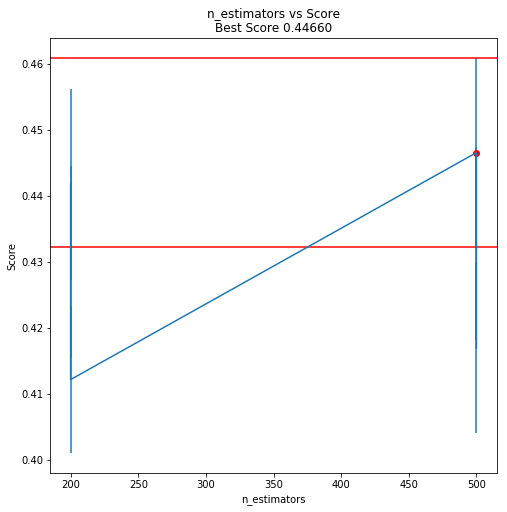

In [96]:
GridSearch_table_plot(CV_rfc, "n_estimators", negative=False)

IndexError: too many indices for array

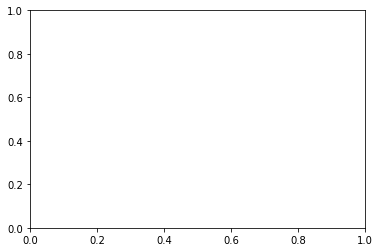

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plot_grid_search(cv_results, grid_param_1, name_param_1):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    #scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    #scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_1):
        ax.plot(grid_param_1, scores_mean[idx,:])

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(CV_rfc.cv_results_, param_grid['n_estimators'], 'N Estimators')

In [24]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=12, criterion='gini')

In [25]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [26]:
pred=rfc1.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,pred)

0.437

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
results = {}
for clf_type in ["Random-Forest", "Gradient-Boosting"]:

    acc_results = []  # accuracy
    if clf_type is "Random-Forest":
        param_grid = {'n_estimators':[200, 500],
                      'max_features':['auto'],
                      'max_depth':[8,12],
                      'criterion':['gini']
                     }
    elif clf_type is "Gradient-Boosting":                                      
        n_estimators = [50, 100]
    
    for n_estimator in n_estimators:
        print("train....... (num trees = {:d} in {:s})".format(n_estimator, clf_type))
        if clf_type is "Random-Forest":
            clf = RandomForestClassifier(n_estimators=n_estimator)
        elif clf_type is "Gradient-Boosting":
            clf = GradientBoostingClassifier(n_estimators=n_estimator, max_depth=2)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc_results.append(100 * accuracy_score(y_test, y_pred))
        print("done.")
    results[clf_type] = (n_estimators, acc_results)
    

import matplotlib.pyplot as plt
for clf_type in ["Random-Forest", "Gradient-Boosting"]:
    plt.plot(results[clf_type][0], results[clf_type][1])
    plt.xlabel("number of trees")
    plt.ylabel("model accuracy")



train....... (num trees = 200 in Random-Forest)
done.
train....... (num trees = 500 in Random-Forest)
done.
train....... (num trees = 50 in Gradient-Boosting)


In [30]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_features': ['auto'], 'max_depth': [12], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 500}

In [32]:
rfc11=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=12, criterion='gini')

In [33]:
rfc11.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [34]:
pred1=rfc1.predict(X_test)

In [35]:
accuracy_score(y_test,pred1)

0.437

In [39]:
#X_train1, y_train1, X_test1, y_test1 = X_train[:7000], y_train[:7000], X_test[:1000], y_test[:1000]
CV_rfc1 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc1.fit(X_train1, y_train1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_features': ['auto'], 'max_depth': [12], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
CV_rfc1.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 500}

In [42]:
rfc12=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=12, criterion='gini')

In [44]:
rfc12.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [45]:
pred2=rfc1.predict(X_test1)

In [46]:
accuracy_score(y_test1,pred2)

0.437

In [48]:
#X_train1, y_train1, X_test1, y_test1 = X_train[:8000], y_train[:8000], X_test[:1500], y_test[:1500]
CV_rfc1 = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc1.fit(X_train1, y_train1)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_features': ['auto'], 'max_depth': [12], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
CV_rfc1.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 500}

In [50]:
rfc123=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=12, criterion='gini')

In [51]:
rfc123.fit(X_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [52]:
pred2=rfc1.predict(X_test1)
accuracy_score(y_test1,pred2)

0.437